In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
import NEMtropy as nem
import numpy as np

In [11]:
# Load the datasets from the assignment_1_data folder
path = "datasets/"
files = [f for f in listdir(path) if isfile(join(path, f))]
gmls = [nx.read_gml(path + f) for f in files]

graphs = {k: v for k, v in zip(files, gmls)}

In [18]:
# Erdos-Rényi random network
n_er = 1000
k_er1 = 1
k_er2 = 4

er_graph1 = nx.erdos_renyi_graph(n_er, k_er1/n_er)
er_graph2 = nx.erdos_renyi_graph(n_er,  k_er2/n_er)

# Barabási-Albert scale-free network
n_ba = 1000
m_ba1 = 2
m_ba2 = 4

ba_graph1 = nx.barabasi_albert_graph(n_ba, m_ba1)
ba_graph2 = nx.barabasi_albert_graph(n_ba, m_ba2)

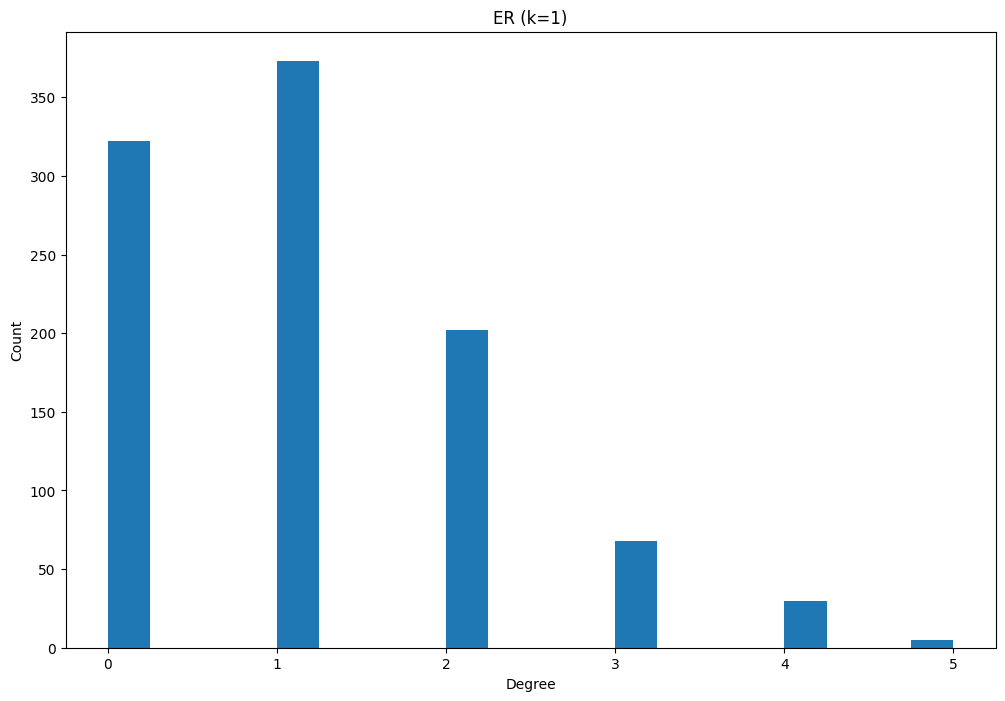

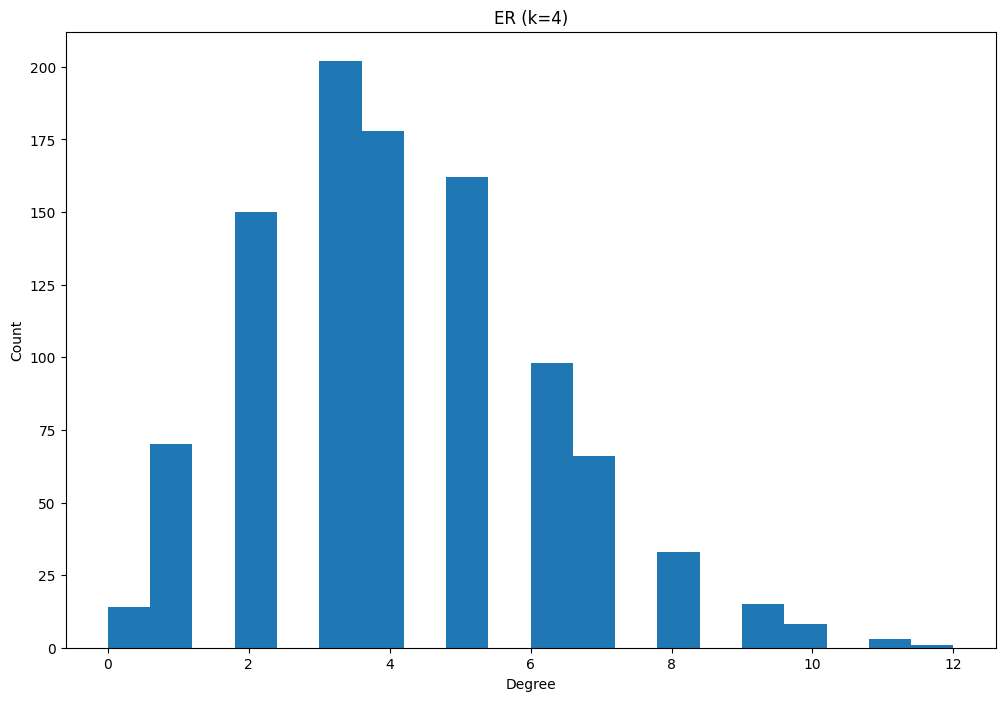

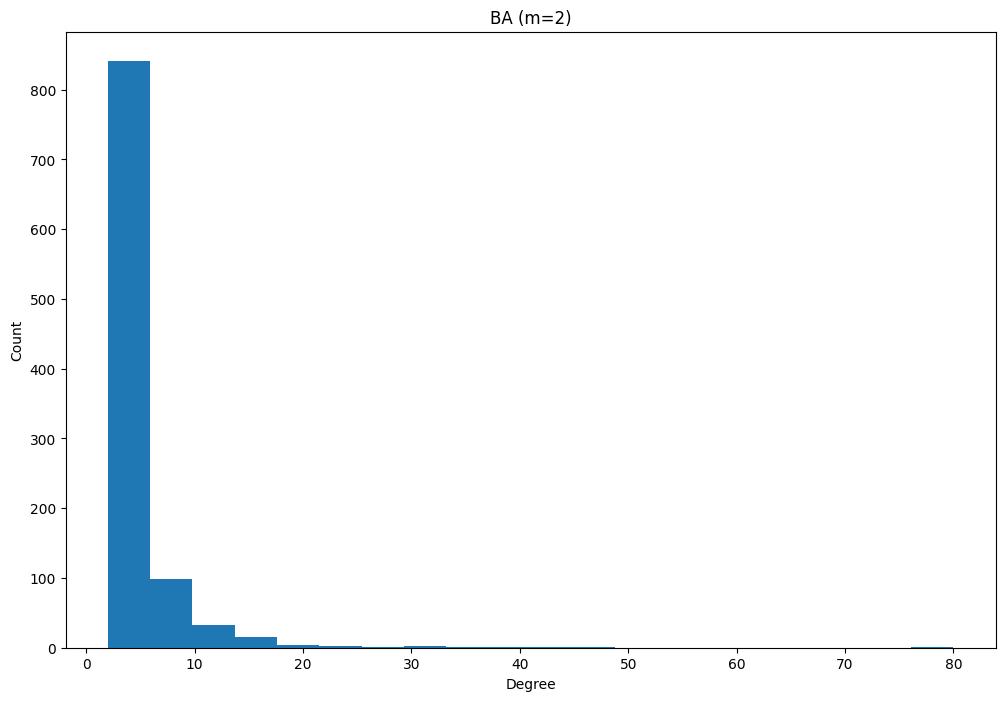

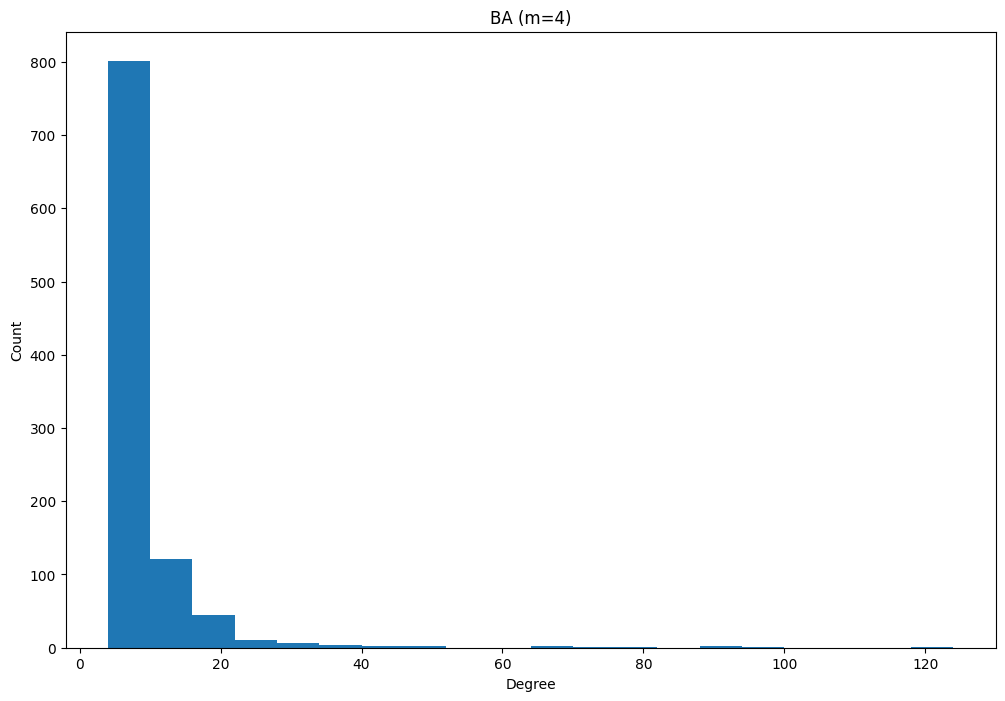

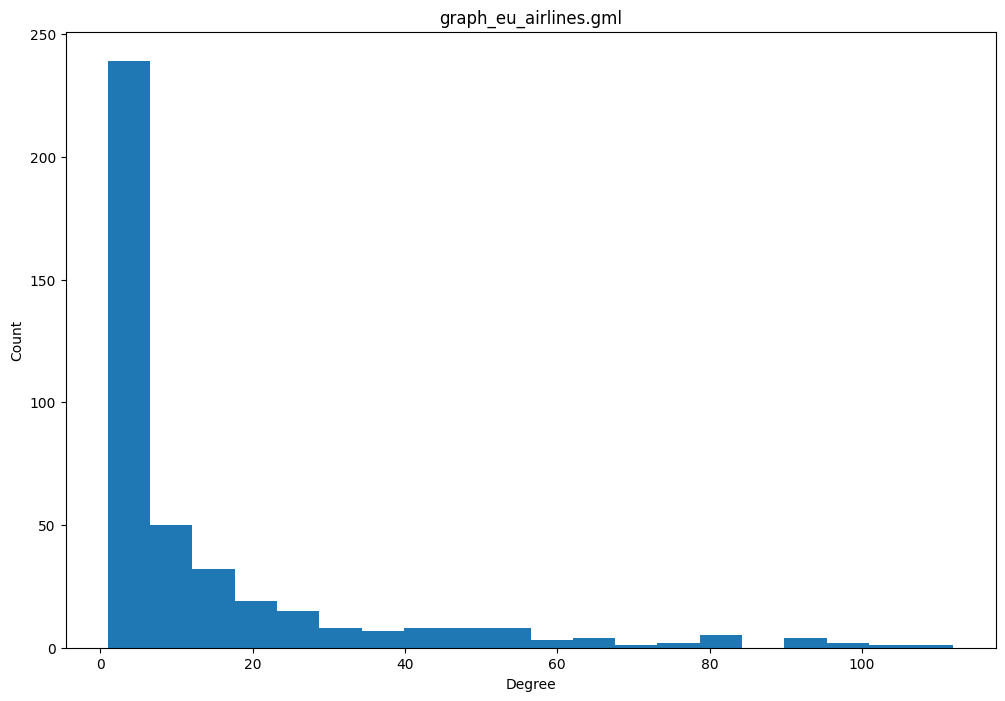

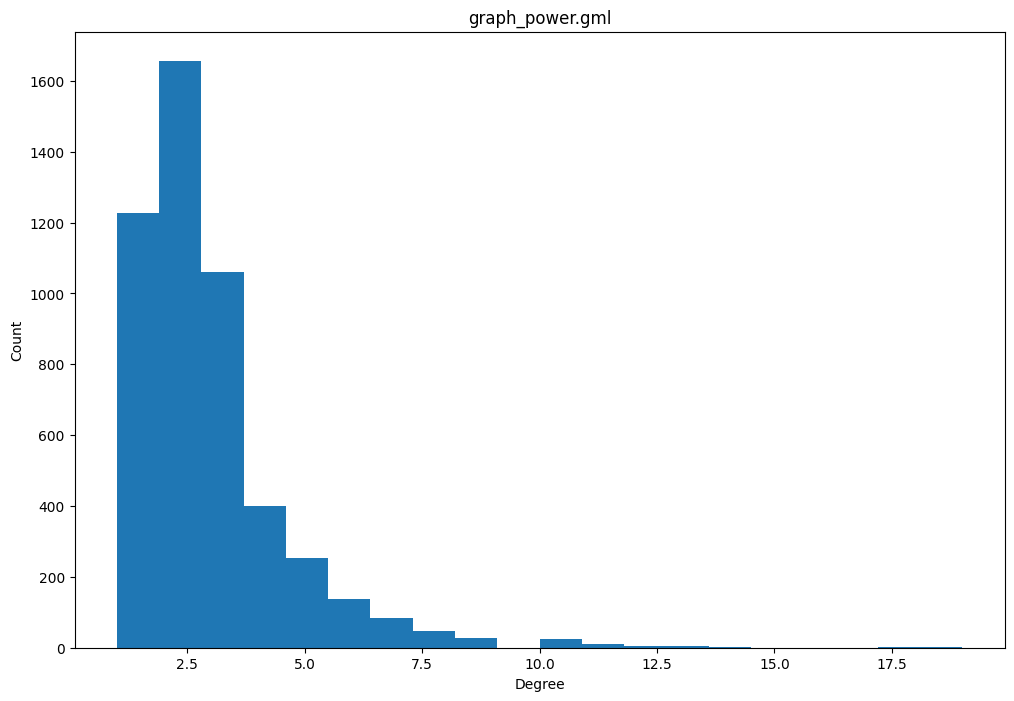

In [19]:
# Function to calculate degree distribution
"""def calculate_degree_distribution(graph):
    degree_sequence = sorted([d for n, d in graph.degree()], reverse=True)
    degree_count = np.unique(degree_sequence, return_counts=True)
    return degree_count"""

def calculate_degree_distribution(graph):
    return dict(nx.degree(graph))

# Function to plot degree distribution
"""def plot_degree_distribution(degree_count, label, linestyle='-'):
    plt.plot(degree_count[0], degree_count[1], linestyle, label=label)"""

def plot_degree_distribution(degree_distribution, title, linestyle='-'):
    plt.figure(figsize=(12, 8))
    plt.title(title)
    plt.xlabel("Degree")
    plt.ylabel("Count")
    plt.hist(degree_distribution.values(), bins=20)
    plt.show()

# Calculate degree distributions
degree_dist_er1 = calculate_degree_distribution(er_graph1)
degree_dist_er2 = calculate_degree_distribution(er_graph2)
degree_dist_ba1 = calculate_degree_distribution(ba_graph1)
degree_dist_ba2 = calculate_degree_distribution(ba_graph2)
degree_dist_datasets = {k: calculate_degree_distribution(v) for k, v in graphs.items()}

# Plot degree distributions
plot_degree_distribution(degree_dist_er1, 'ER (k=1)', linestyle='-')
plot_degree_distribution(degree_dist_er2, 'ER (k=4)', linestyle='--')
plot_degree_distribution(degree_dist_ba1, 'BA (m=2)', linestyle='-')
plot_degree_distribution(degree_dist_ba2, 'BA (m=4)', linestyle='--')

for k, v in degree_dist_datasets.items():
    plot_degree_distribution(v, k)
    


ValueError: a must be 1-dimensional

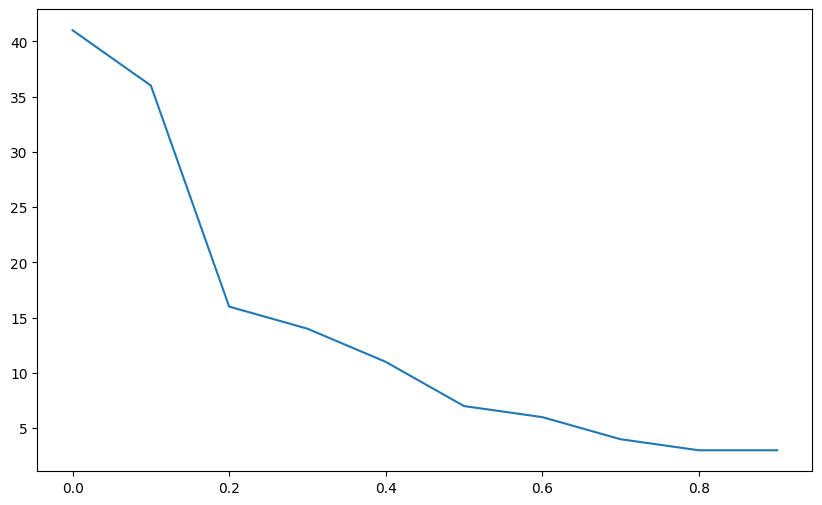

In [13]:
# Function to calculate the size of the largest connected component after removing nodes or edges
def calculate_largest_connected_component_size(graph, removal_method, percentage):
    G_copy = graph.copy()

    if removal_method == 'random_nodes':
        nodes_to_remove = np.random.choice(list(G_copy.nodes()), size=int(percentage * len(G_copy)), replace=False)
        G_copy.remove_nodes_from(nodes_to_remove)
    elif removal_method == 'random_edges':
        edges_to_remove = np.random.choice(list(G_copy.edges()), size=int(percentage * len(G_copy.edges())), replace=False)
        G_copy.remove_edges_from(edges_to_remove)
    elif removal_method == 'targeted_degree':
        degree_centrality = nx.degree_centrality(G_copy)
        nodes_to_remove = sorted(degree_centrality, key=degree_centrality.get, reverse=True)[:int(percentage * len(G_copy))]
        G_copy.remove_nodes_from(nodes_to_remove)
    elif removal_method == 'targeted_betweenness':
        betweenness_centrality = nx.betweenness_centrality(G_copy)
        nodes_to_remove = sorted(betweenness_centrality, key=betweenness_centrality.get, reverse=True)[:int(percentage * len(G_copy))]
        G_copy.remove_nodes_from(nodes_to_remove)

    # Return the size of the largest connected component
    largest_connected_component_size = len(max(nx.connected_components(G_copy), key=len))
    return largest_connected_component_size

# Function to plot the size of the largest connected component
def plot_largest_connected_component_size(graph, scenarios, percentages, title):
    plt.figure(figsize=(10, 6))

    for scenario in scenarios:
        sizes = [calculate_largest_connected_component_size(graph, scenario, p) for p in percentages]
        plt.plot(percentages, sizes, label=scenario)

    plt.xlabel('Percentage of Removed Nodes/Edges')
    plt.ylabel('Size of Largest Connected Component')
    plt.title(title)
    plt.legend()
    plt.show()

# Replace synthetic_graph and dataset_graph with your actual data
synthetic_graph = {"ER k=1": er_graph1, "ER k=4": er_graph2, "BA m=2": ba_graph1, "BA m=4": ba_graph2}
dataset_graph = graphs

# Define scenarios and percentages
attack_scenarios = ['random_nodes', 'random_edges', 'targeted_degree', 'targeted_betweenness']
removal_percentages = np.linspace(0, 0.9, 10)

# Plot the size of the largest connected component for synthetic and dataset graphs
for k, v in synthetic_graph.items():
    plot_largest_connected_component_size(v, attack_scenarios, removal_percentages, k)

for k, v in dataset_graph.items():
    plot_largest_connected_component_size(v, attack_scenarios, removal_percentages, k)
